# Spreadsheets requested to describe towns' "ability to pay" 

In order to compare towns' ability to deal with state budget cuts and changes, these were requested by colleague:

1. DONE - Expenditures over time - have from 2011 to 2015 but need prior years 
2. DONE - Education spending as a percent of total expenditures
2. SKIP IT
3. DONE - Mill rates from - have from 2011 to 2017 but need prior years
4. DONE - Grants revenue, tax revenue and total revenue
5. SKIP IT
6. DONE - Unassigned town fund balance - anything before 2017
7. DONE - Pension liability funding levels
7. DONE - Debt to grand list ratio
10. DONE - Tax collection rate
11. SKIP IT - Net grand list and tax exempt property
12. Are towns catching up with big pension payments?

# 1. Expenditures over time

In [67]:
# Total_Expenditures from "FISCIN*.csv" sheets

import pandas as pd
import os

def get_fiscin_cols(col="Total_Expenditures"):
    
    cols = ["Municipality"] + [col]
    
    files = {
        2015:"MuniFiscalIndicators_11_15_CSV/FISCIN15.csv",
        2014:"MuniFiscalIndicators_11_15_CSV/FISCIN14.csv",
        2013:"MuniFiscalIndicators_11_15_CSV/FISCIN13.csv",
        2012:"MuniFiscalIndicators_11_15_CSV/FISCIN12.csv",
        2011:"MuniFiscalIndicators_11_15_CSV/FISCIN11.csv",
        2010:"MuniFiscalIndicators_11_15_CSV/FISCIN10.csv",
        2009:"FI2010-2014AsOf4-19-16_CSV/FISCIN09.csv",
        2008:"FI2009-13V2000_CSV/FISCIN08.csv",
        2007:"FI2008-12V2000_CSV/FISCIN07.csv", 
        2006:"FI2006-10V2000_CSV/FISCIN06.csv",
        2005:"FI2003-07V2000_CSV/FISCIN05.csv",
        2004:"FI2003-07V2000_CSV/FISCIN04.csv",
        2003:"FI2003-07V2000_CSV/FISCIN03.csv",
        2002:"FI2003-07V2000_CSV/FISCIN02.csv"
    }
    
    def get_col(df,cols=cols):
        ret = df[cols]
        return ret
    
    frames = []
    
    for f in range(2002,2016):
        try:
            df = get_col(pd.read_csv("../data/" + files[f]))
            df["year"] = f
            frames.append(df)
        except:
            pass
#             raise Exception("Error processing " + str(files[f]))        
        
        #df = df.set_index(["Municipality","year"])
        
    
    ret = pd.concat(frames)
    
    ret = pd.pivot_table(ret,values=col,columns="year",index="Municipality").reset_index()
    
    return ret
    
get_fiscin_cols().to_csv("output/total_expenditures.csv",index=False)
get_fiscin_cols()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,6448333.0,7156978.0,7536333.0,8381319.0,9136118.0,9291904.0,10741358.0,9920656.0,9691506.0,9885945.0,10178489.0,10532064.0,11010158.0,10654609.0
1,ANSONIA,42485212.0,43085986.0,45924355.0,48862080.0,50489528.0,52816370.0,63057989.0,57203675.0,57010349.0,60091435.0,60374860.0,65544136.0,63866446.0,63610501.0
2,ASHFORD,9451222.0,10136243.0,10480122.0,11048897.0,12110482.0,12888049.0,15206197.0,13579707.0,13627610.0,13992024.0,13933046.0,14635662.0,14457564.0,14704766.0
3,AVON,45048182.0,48985655.0,51606923.0,53705866.0,57587759.0,60098481.0,76896853.0,66917304.0,67761526.0,69814606.0,77584466.0,77657612.0,81014128.0,83241864.0
4,BARKHAMSTED,7893997.0,8340901.0,8524077.0,8702843.0,9053646.0,9682000.0,11040510.0,10467390.0,10307196.0,10396219.0,10524397.0,10874884.0,11429152.0,11590983.0
5,BEACON FALLS,12561598.0,12442180.0,13277277.0,14478449.0,15144204.0,16157980.0,16677796.0,17866375.0,17924817.0,17955715.0,18881175.0,19243334.0,19597961.0,20837294.0
6,BERLIN,49246251.0,50443804.0,50509814.0,54267876.0,58791912.0,62204634.0,75715807.0,67323986.0,67177138.0,69306749.0,73665280.0,74962416.0,78995047.0,80585094.0
7,BETHANY,13183641.0,13792258.0,14593807.0,15228435.0,16420767.0,17747299.0,19329336.0,20058750.0,20327253.0,20507631.0,20977192.0,21122240.0,21893677.0,22615263.0
8,BETHEL,43578771.0,46132958.0,48639540.0,50062478.0,54323509.0,56162029.0,68162769.0,61580957.0,61239489.0,63286545.0,65588401.0,68400169.0,71144751.0,71522070.0
9,BETHLEHEM,7281184.0,8009713.0,8208449.0,8266713.0,8646722.0,9050967.0,9511953.0,9385525.0,9261747.0,9091988.0,9229588.0,9186972.0,9392750.0,9440115.0


# 2. Education expenditures

Education / Total_Expenditures

In [2]:

edu = get_fiscin_cols(col="Education")

In [3]:
total_exp = get_fiscin_cols(col="Total_Expenditures")

In [4]:
total_exp.head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,6448333.0,7156978.0,7536333.0,8381319.0,9136118.0,9291904.0,10741358.0,9920656.0,9691506.0,9885945.0,10178489.0,10532064.0,11010158.0,10654609.0
1,ANSONIA,42485212.0,43085986.0,45924355.0,48862080.0,50489528.0,52816370.0,63057989.0,57203675.0,57010349.0,60091435.0,60374860.0,65544136.0,63866446.0,63610501.0
2,ASHFORD,9451222.0,10136243.0,10480122.0,11048897.0,12110482.0,12888049.0,15206197.0,13579707.0,13627610.0,13992024.0,13933046.0,14635662.0,14457564.0,14704766.0
3,AVON,45048182.0,48985655.0,51606923.0,53705866.0,57587759.0,60098481.0,76896853.0,66917304.0,67761526.0,69814606.0,77584466.0,77657612.0,81014128.0,83241864.0
4,BARKHAMSTED,7893997.0,8340901.0,8524077.0,8702843.0,9053646.0,9682000.0,11040510.0,10467390.0,10307196.0,10396219.0,10524397.0,10874884.0,11429152.0,11590983.0


In [133]:

def a_pct_b(a,b,cust_index=["Municipality"]):
    
    a = a.set_index(cust_index)
    b = b.set_index(cust_index)
        
    combined = a.join(b,how="outer",lsuffix="_a",rsuffix="_b")
#     combined = pd.merge(a,b,how="outer",suffixes=("_a","_b"),left_index=True,right_index=True)

#     return combined #debug line
    
    cols = []
    for c in range(2002,2016):
        try:
            combined[c] = combined[str(c) + "_a"] / combined[str(c) + "_b"]
            cols.append(c)
        except:
            pass 
    
    
    return combined[cols].reset_index()

a_pct_b(edu,total_exp)#.to_csv("output/education_expenditures_pct.csv",index=False)

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,0.761493,0.752306,0.754738,0.765345,0.755579,0.808011,0.821968,0.812129,0.809428,0.810227,0.826115,0.813028,0.799324,0.804986
1,ANSONIA,0.493676,0.523954,0.526585,0.543849,0.548373,0.561586,0.609249,0.551031,0.566261,0.530789,0.559252,0.520637,0.560307,0.582134
2,ASHFORD,0.776194,0.766322,0.778602,0.761876,0.768773,0.773663,0.770519,0.796535,0.798758,0.791133,0.795575,0.768692,0.813315,0.800556
3,AVON,0.626243,0.616698,0.620230,0.628652,0.650119,0.648370,0.710628,0.660708,0.666228,0.672893,0.661115,0.687592,0.699047,0.698543
4,BARKHAMSTED,0.799552,0.802952,0.792817,0.789850,0.788558,0.802238,0.814745,0.799758,0.821254,0.818831,0.816959,0.813996,0.819231,0.813770
5,BEACON FALLS,0.693826,0.716897,0.729949,0.704842,0.700803,0.686310,0.700810,0.708367,0.699259,0.701381,0.705075,0.702376,0.713270,0.701352
6,BERLIN,0.588622,0.591560,0.589162,0.592812,0.596597,0.596351,0.667740,0.618667,0.630309,0.620056,0.611472,0.615088,0.609851,0.594220
7,BETHANY,0.747532,0.733860,0.736773,0.737288,0.742906,0.751241,0.756911,0.750080,0.760907,0.748057,0.734669,0.738539,0.727295,0.725395
8,BETHEL,0.658303,0.655318,0.639906,0.648548,0.639083,0.641904,0.675265,0.645694,0.635502,0.630132,0.643187,0.646879,0.651974,0.650392
9,BETHLEHEM,0.761286,0.757960,0.762815,0.764110,0.754891,0.755844,0.748425,0.744226,0.735164,0.741401,0.744348,0.738523,0.747137,0.735810


In [87]:
edu.to_csv("output/education_expenditures.csv",
           index=False)

# 4. Mill rate


In [88]:
# def get_mill_rates():
    
#     files = {
#         "2015":"MuniFiscalIndicators_11_15_CSV/ACMR 2015 GL Year.csv",
#         "2014":"MuniFiscalIndicators_11_15_CSV/ACMR 2014 GL Year.csv",
#         "2013":"MuniFiscalIndicators_11_15_CSV/ACMR 2013 GL Year.csv",
#         "2012":"MuniFiscalIndicators_11_15_CSV/ACMR 2012 GL Year.csv",
#         "2011":"MuniFiscalIndicators_11_15_CSV/ACMR 2011 GL Year.csv",
#         "2010":"MuniFiscalIndicators_11_15_CSV/ACMR 2010 GL Year.csv",
#         "2009":"MuniFiscalIndicators_11_15_CSV/ACMR 2009 GL Year.csv",
#         "2008":"FI2005-09V2000_CSV/ACMR 2008 GL YEAR.csv",
#         "2007":"FI2005-09V2000_CSV/ACMR 2007 GL YEAR.csv",
#         "2006":"FI2005-09V2000_CSV/ACMR 2006 GL YEAR.csv",
#         "2005":"FI2005-09V2000_CSV/ACMR 2005 GL YEAR.csv",
#         "2004":"FI2005-09V2000_CSV/ACMR 2004 GL YEAR.csv",
#         "2003":"FI2005-09V2000_CSV/ACMR 2003 GL YEAR.csv",
#         "2002":None
#     }
    
#     for f in files:
        
#         if files[f] == None:
#             continue

#         path = "../data/" + files[f]
            
#         print path
        
#         df = pd.read_csv(path)
        
#         # For testing the column names. 
#         # Unfortunately, they are not the same in each file,
#         # so I'm going to have to hard code the columns.
#         for c in df.columns:
#             print "\t" + f + "\t" + c
    
#         ycols = {
#             2003:""
#         }
# get_mill_rates()
    

In [89]:
get_fiscin_cols(col="ACMR").head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,30.3,29.90,31.9,31.30,34.50,41.30,26.30,27.60,27.60,27.60,27.60,30.80,30.77,30.72
1,ANSONIA,32.4,36.30,29.4,30.27,30.86,32.30,32.32,25.25,25.25,25.75,26.25,27.65,39.34,38.61
2,ASHFORD,33.0,34.50,29.0,31.00,31.60,33.00,33.70,24.65,24.65,25.43,25.60,31.05,31.65,32.16
3,AVON,25.9,27.30,28.3,23.46,24.16,24.85,25.55,26.53,23.41,24.44,25.04,25.65,26.32,28.32
4,BARKHAMSTED,27.5,29.65,32.2,26.10,26.10,26.70,26.70,26.70,22.03,22.39,22.67,23.39,24.26,27.37


In [90]:
get_fiscin_cols(col="ACMR").to_csv("output/mill_rates_not_equalized.csv",index=False)

# 5. Grant, tax and total revenue

In [91]:
get_fiscin_cols(col="Inter_Gov_Rev").head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,1920842.0,1955525.0,2141961.0,2378966.0,2542734.0,2438728.0,3810247.0,2720551.0,2378006.0,2431822.0,2835725.0,2930349.0,2979697.0,3019532.0
1,ANSONIA,19858777.0,18748382.0,20258357.0,22499276.0,23647537.0,24511137.0,32920804.0,26302924.0,26465983.0,27166329.0,26864426.0,29957368.0,28229568.0,27853347.0
2,ASHFORD,3846893.0,4081674.0,3826456.0,3834093.0,4316018.0,4629417.0,6761186.0,5027254.0,5101308.0,4903431.0,5120557.0,4953913.0,5109447.0,5028901.0
3,AVON,3079208.0,2920876.0,2801229.0,2950842.0,4246236.0,4265347.0,18352155.0,5662776.0,5477312.0,5710137.0,10519982.0,8450231.0,10344758.0,9442455.0
4,BARKHAMSTED,1771411.0,1707707.0,1657385.0,1632532.0,1752399.0,1718189.0,2988431.0,2144721.0,2045723.0,2040073.0,2118537.0,2215545.0,2207868.0,2206661.0


In [92]:
get_fiscin_cols(col="Tax_Rev").head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,4407310.0,4994097.0,5372678.0,5356471.0,6163729.0,7653190.0,7190202.0,7532534.0,7692664.0,7414142.0,7520427.0,7845981.0,7874644.0,7940342.0
1,ANSONIA,19023530.0,21604976.0,22819320.0,23455230.0,23737835.0,25391667.0,25899905.0,28644425.0,28819951.0,29439270.0,30079600.0,32175591.0,34270829.0,34134309.0
2,ASHFORD,5664243.0,6191297.0,6396039.0,7093551.0,7492707.0,8033841.0,8284714.0,8454058.0,8390817.0,8689053.0,8882703.0,9247248.0,9504537.0,9572093.0
3,AVON,41342284.0,44995486.0,48012671.0,49213013.0,52054364.0,54940024.0,57607095.0,60443984.0,61251149.0,64340735.0,66477970.0,68836758.0,71328459.0,72702548.0
4,BARKHAMSTED,5909996.0,6440327.0,7156805.0,7417262.0,7606018.0,7913331.0,8022185.0,8126597.0,8122029.0,8258860.0,8445529.0,8770258.0,9101908.0,9377549.0


In [93]:
get_fiscin_cols(col="Total_Revenue").to_csv("output/total_revenue.csv",index=False)
get_fiscin_cols(col="Total_Revenue").tail()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
165,WINDSOR LOCKS,31647101.0,32065180.0,33547234.0,34789951.0,39763876.0,40864305.0,50641155.0,44417601.0,43380426.0,45227861.0,47322569.0,47899212.0,50171300.0,49251423.0
166,WOLCOTT,38089866.0,40937384.0,42237694.0,42619790.0,46250600.0,47093848.0,59355244.0,51293437.0,49276901.0,49642270.0,51428413.0,53109249.0,54641282.0,56261679.0
167,WOODBRIDGE,30668764.0,32513418.0,33229327.0,34993302.0,37225600.0,38057145.0,40619443.0,41396144.0,41890647.0,43591945.0,44568176.0,46986688.0,46852591.0,47643390.0
168,WOODBURY,19575630.0,21114720.0,21646865.0,23514213.0,23983052.0,25582192.0,27707407.0,29226911.0,27415365.0,27823632.0,29490009.0,30446285.0,31067032.0,31352868.0
169,WOODSTOCK,15622200.0,15760625.0,16900258.0,17460887.0,19281704.0,19722683.0,20859765.0,21746008.0,21556594.0,21737715.0,22471650.0,22651597.0,22924854.0,23211644.0


In [94]:
a_pct_b(get_fiscin_cols(col="Inter_Gov_Rev"),
        get_fiscin_cols(col="Total_Revenue")).head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,0.291493,0.273381,0.275907,0.297231,0.285037,0.234492,0.338902,0.261485,0.234092,0.244637,0.271313,0.268155,0.272651,0.273476
1,ANSONIA,0.469745,0.439186,0.444652,0.462930,0.465956,0.456173,0.516865,0.452213,0.457959,0.456481,0.444021,0.456892,0.420333,0.418222
2,ASHFORD,0.384465,0.380661,0.356950,0.335280,0.346440,0.345713,0.430598,0.358650,0.363562,0.350867,0.355039,0.339119,0.340772,0.335085
3,AVON,0.066128,0.058130,0.052532,0.053632,0.071308,0.068393,0.230413,0.082740,0.080000,0.078077,0.132214,0.104642,0.121833,0.110743
4,BARKHAMSTED,0.224287,0.205169,0.184363,0.176183,0.181970,0.172646,0.263072,0.204766,0.198312,0.195556,0.198200,0.199187,0.193075,0.187303


In [95]:
# get_fiscin_cols(col="Inter_Gov_Rev")
# get_fiscin_cols(col="Tax_Rev")
# get_fiscin_cols(col="Total_Revenue")

# a_pct_b(get_fiscin_cols(col="Inter_Gov_Rev"),
#         get_fiscin_cols(col="Total_Revenue"))

a_pct_b(get_fiscin_cols(col="Tax_Rev"),
        get_fiscin_cols(col="Total_Revenue")).head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,0.668821,0.698171,0.692056,0.669244,0.690946,0.735882,0.639532,0.723988,0.757268,0.745851,0.719531,0.717982,0.720553,0.719148
1,ANSONIA,0.449988,0.506102,0.500863,0.482599,0.467735,0.472560,0.406635,0.492469,0.498691,0.494674,0.497162,0.490723,0.510286,0.512532
2,ASHFORD,0.566094,0.577406,0.596654,0.620309,0.601427,0.599947,0.527626,0.603121,0.598000,0.621749,0.615890,0.633018,0.633901,0.637806
3,AVON,0.887848,0.895477,0.900396,0.894455,0.874164,0.880937,0.723262,0.883160,0.894615,0.879760,0.835485,0.852425,0.840055,0.852669
4,BARKHAMSTED,0.748294,0.773760,0.796102,0.800472,0.789812,0.795144,0.706193,0.775882,0.787347,0.791672,0.790121,0.788484,0.795949,0.795975


In [96]:
a_pct_b(get_fiscin_cols(col="Inter_Gov_Rev"),
        get_fiscin_cols(col="Total_Revenue")).to_csv("output/rev_intergov_pct.csv",index=False)

In [97]:
a_pct_b(get_fiscin_cols(col="Tax_Rev"),
        get_fiscin_cols(col="Total_Revenue")).to_csv("output/rev_tax_pct.csv",index=False)

# 6. Unassigned fund balance as pct of expenditures

Prior to 2011, the report went from "undesignated" to "unassigned". I think these are the same but want to confirm. I also want to find out if the best way to represent fund balance comparatively is as a percentage of "Total Expenditures."

* William Plummer (860) 418-6367 is out of the office until Aug 14
* Left message for Bob Dakers, OPM 860-418-6422

Partial answer: These classifications are not comparable, according to Page A-5, [here] (http://www.ct.gov/opm/lib/opm/FI_2010-2014_AsOf_4-19-16.pdf):

"For FYE 2011 and subsequent years, all municipalities were
required to implement GASB Statement No. 54, “Fund Balance
Reporting and Governmental Fund Type Definitions”. This
Statement established criteria for classifying fund balances into
specific new defined classifications. These new classifications
are not comparable to the reserve/designated/undesignated fund
balance classifications previously presented in governmental
fund financial statements."


In [98]:
get_fiscin_cols(col="Unassigned_Fund_Bal").to_csv("output/fund_bal_unassigned.csv",index=False)
get_fiscin_cols(col="Unassigned_Fund_Bal").head()

year,Municipality,2011,2012,2013,2014,2015
0,ANDOVER,1533102.0,1943720.0,2266912.0,2415170.0,2663238.0
1,ANSONIA,6393685.0,6350791.0,7431490.0,9532434.0,13174667.0
2,ASHFORD,1340002.0,1700987.0,2022519.0,1910173.0,1625757.0
3,AVON,6084975.0,6610507.0,8035653.0,8687086.0,8003009.0
4,BARKHAMSTED,1240666.0,1454957.0,1550465.0,1434112.0,1394341.0


In [99]:
# Unassigned fund balance as a percentage of total revenue

# NOTE: I have more often seen this number as a percentage of total revenue AND OTHER SOURCES
# (which I think is just transfers), BUT, that isn't a column in the spreadsheet,
# it is a calculated value, and I don't want to calculate it wrong.

# So it's best to just note that distinction.

a_pct_b(get_fiscin_cols(col="Unassigned_Fund_Bal"),
       get_fiscin_cols(col="Total_Revenue"))\
.to_csv("output/fund_bal_unassigned_pct.csv",index=False)

#.set_index("Municipality")\
#.mean()\
#.transpose()\
#.plot.line(legend=False)


In [100]:
get_fiscin_cols(col="Unreserved_Fund_Bal")
get_fiscin_cols(col="Unreserved_Fund_Bal").head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ANDOVER,1335518.0,1260736.0,1220778.0,348026.0,-284523.0,544494.0,1013848.0,1353436.0,1676718.0
1,ANSONIA,3106313.0,3153063.0,3246263.0,4058569.0,4681519.0,5554010.0,6223648.0,6470024.0,6621532.0
2,ASHFORD,971340.0,1367034.0,1567739.0,1885175.0,2084513.0,2599819.0,2228626.0,1608068.0,1767465.0
3,AVON,4153303.0,4245984.0,3941547.0,3657223.0,4159172.0,3760315.0,4676227.0,5253522.0,5100539.0
4,BARKHAMSTED,903020.0,878961.0,1271350.0,1654502.0,1874503.0,1646598.0,1481266.0,1482520.0,1415329.0


In [101]:
def a_moins_b(a, b):
    
    a = a.set_index("Municipality")
    b = b.set_index("Municipality")
    
    combined = a.join(b,how="outer",lsuffix="_a",rsuffix="_b")
    
    cols = []
    for c in range(2002,2016):

        try:
            combined[c] = combined[str(c) + "_a"] - combined[str(c) + "_b"]
            cols.append(c)
        except:
            continue
    
    return combined[cols].reset_index()



In [102]:
# The "Undesignated" fund balance in 2010 and prior reports is calculated this way
a_moins_b(a_moins_b(get_fiscin_cols(col="Total_Fund_Bal"),
                    get_fiscin_cols(col="Reserv_Fund_Bal")),
          get_fiscin_cols(col="Design_Fund_Bal")).to_csv("output/fund_bal_undesignated.csv",index=False)

a_moins_b(a_moins_b(get_fiscin_cols(col="Total_Fund_Bal"),
                    get_fiscin_cols(col="Reserv_Fund_Bal")),
          get_fiscin_cols(col="Design_Fund_Bal"))#.head()


year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ANDOVER,1335518.0,970736.0,425110.0,0.0,-284523.0,544494.0,1013848.0,1353436.0,1676718.0
1,ANSONIA,2981313.0,2710662.0,2746297.0,3917915.0,4508537.0,5081853.0,5725528.0,6048039.0,6311558.0
2,ASHFORD,971340.0,1094423.0,1295671.0,1485175.0,1767025.0,2599819.0,2228626.0,1486568.0,1617465.0
3,AVON,3378303.0,3845984.0,3016547.0,3557223.0,3984172.0,3515315.0,4488669.0,4789580.0,4652097.0
4,BARKHAMSTED,773020.0,828961.0,1271350.0,1404502.0,1374503.0,1146598.0,1481266.0,1199277.0,1315329.0
5,BEACON FALLS,929324.0,1790093.0,1469948.0,1772230.0,1025501.0,1211252.0,1389120.0,1277454.0,869481.0
6,BERLIN,4400980.0,4422615.0,4410350.0,5637646.0,6735039.0,7870925.0,7519032.0,7199724.0,7479806.0
7,BETHANY,1571877.0,1763192.0,1888430.0,2087043.0,2583949.0,2836258.0,2599597.0,2504212.0,2582175.0
8,BETHEL,4311789.0,5021438.0,5111783.0,5601331.0,5166717.0,5260264.0,5937527.0,6152022.0,6444053.0
9,BETHLEHEM,342537.0,426469.0,199511.0,207562.0,84677.0,342406.0,325553.0,707706.0,873670.0


In [103]:
# This is the nominal unassigned or undesignated fund balance for each town

a_moins_b(a_moins_b(get_fiscin_cols(col="Total_Fund_Bal"),
                    get_fiscin_cols(col="Reserv_Fund_Bal")),
          get_fiscin_cols(col="Design_Fund_Bal")).set_index("Municipality").join(
    get_fiscin_cols(col="Unassigned_Fund_Bal").set_index("Municipality"),
    how="left"
).head()

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Municipality,,,,,,,,,,,,,,
ANDOVER,1335518.0,970736.0,425110.0,0.0,-284523.0,544494.0,1013848.0,1353436.0,1676718.0,1533102.0,1943720.0,2266912.0,2415170.0,2663238.0
ANSONIA,2981313.0,2710662.0,2746297.0,3917915.0,4508537.0,5081853.0,5725528.0,6048039.0,6311558.0,6393685.0,6350791.0,7431490.0,9532434.0,13174667.0
ASHFORD,971340.0,1094423.0,1295671.0,1485175.0,1767025.0,2599819.0,2228626.0,1486568.0,1617465.0,1340002.0,1700987.0,2022519.0,1910173.0,1625757.0
AVON,3378303.0,3845984.0,3016547.0,3557223.0,3984172.0,3515315.0,4488669.0,4789580.0,4652097.0,6084975.0,6610507.0,8035653.0,8687086.0,8003009.0
BARKHAMSTED,773020.0,828961.0,1271350.0,1404502.0,1374503.0,1146598.0,1481266.0,1199277.0,1315329.0,1240666.0,1454957.0,1550465.0,1434112.0,1394341.0


In [104]:
# Now, let's make the a percent of the total revenuea

a_pct_b(a_moins_b(a_moins_b(get_fiscin_cols(col="Total_Fund_Bal"),
                    get_fiscin_cols(col="Reserv_Fund_Bal")),
          get_fiscin_cols(col="Design_Fund_Bal")).set_index("Municipality").join(
    get_fiscin_cols(col="Unassigned_Fund_Bal").set_index("Municipality"),
    how="left"
).reset_index(),get_fiscin_cols(col="Total_Revenue"))

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,0.202668,0.135708,0.054759,0.000000,-0.031895,0.052355,0.090177,0.130085,0.165057,0.154228,0.185969,0.207444,0.220995,0.241206
1,ANSONIA,0.070521,0.063498,0.060279,0.080612,0.088837,0.094578,0.089892,0.103981,0.109213,0.107434,0.104967,0.113341,0.141936,0.197820
2,ASHFORD,0.097077,0.102067,0.120867,0.129874,0.141836,0.194148,0.141934,0.106053,0.115274,0.095884,0.117939,0.138451,0.127398,0.108327
3,AVON,0.072551,0.076541,0.056570,0.064653,0.066907,0.056366,0.056356,0.069982,0.067947,0.083203,0.083080,0.099508,0.102310,0.093861
4,BARKHAMSTED,0.097876,0.099594,0.141421,0.151574,0.142729,0.115212,0.130396,0.114500,0.127508,0.118927,0.136118,0.139393,0.125411,0.118353
5,BEACON FALLS,0.077501,0.139934,0.112909,0.121900,0.068108,0.075779,0.084339,0.071876,0.049579,0.046122,0.045785,0.107724,0.151560,0.112457
6,BERLIN,0.087067,0.085782,0.086721,0.099959,0.110633,0.122819,0.096639,0.106562,0.111196,0.120686,0.124704,0.138872,0.122434,0.124717
7,BETHANY,0.110692,0.121469,0.127040,0.131687,0.147685,0.153809,0.133208,0.122245,0.124007,0.124973,0.139006,0.137482,0.141309,0.111097
8,BETHEL,0.093450,0.105049,0.102818,0.109108,0.094509,0.091874,0.085838,0.098126,0.104152,0.108942,0.133998,0.153823,0.181867,0.205253
9,BETHLEHEM,0.045912,0.053809,0.023531,0.025005,0.009388,0.035606,0.032076,0.069960,0.086591,0.093570,0.106117,0.136278,0.148869,0.134958


In [105]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

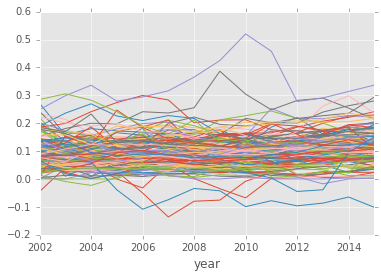

In [106]:
a_pct_b(a_moins_b(a_moins_b(get_fiscin_cols(col="Total_Fund_Bal"),
                    get_fiscin_cols(col="Reserv_Fund_Bal")),
          get_fiscin_cols(col="Design_Fund_Bal")).set_index("Municipality").join(
    get_fiscin_cols(col="Unassigned_Fund_Bal").set_index("Municipality"),
    how="left"
).reset_index(),get_fiscin_cols(col="Total_Revenue")).set_index("Municipality").transpose().plot.line(legend=False)


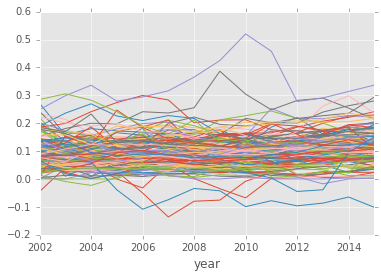

In [107]:
a_pct_b(a_moins_b(a_moins_b(get_fiscin_cols(col="Total_Fund_Bal"),
                    get_fiscin_cols(col="Reserv_Fund_Bal")),
          get_fiscin_cols(col="Design_Fund_Bal")).set_index("Municipality").join(
    get_fiscin_cols(col="Unassigned_Fund_Bal").set_index("Municipality"),
    how="left"
).reset_index(),get_fiscin_cols(col="Total_Revenue")).set_index("Municipality").transpose().plot.line(legend=False)


# 10. Tax collection rate


In [108]:
get_fiscin_cols(col="Overal_Total_Tax_Collection_Rate").to_csv("output/tax_collection_rate.csv",index=False)
get_fiscin_cols(col="Overal_Total_Tax_Collection_Rate").head()


year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,0.954594,0.972351,0.977683,0.974046,0.971810,0.983748,0.981958,0.980309,0.992351,0.988826,0.984499,0.982969,0.981341,0.984702
1,ANSONIA,0.894987,0.894809,0.923525,0.932529,0.928657,0.929712,0.918719,0.921235,0.918423,0.912944,0.914689,0.912908,0.909393,0.935313
2,ASHFORD,0.952674,0.957092,0.955919,0.964741,0.960482,0.962171,0.953210,0.951860,0.946127,0.937319,0.937655,0.934940,0.937916,0.931388
3,AVON,0.993130,0.994822,0.998146,0.998410,0.997957,0.997279,0.999160,0.997890,0.997854,0.996942,0.996531,0.997206,0.996585,0.995131
4,BARKHAMSTED,0.957149,0.960132,0.961612,0.959636,0.963898,0.963610,0.956879,0.949137,0.948605,0.945761,0.937849,0.931706,0.929099,0.925941


# 8. Pension funding

Here's the formula

    "Plan Fiduciary Net Position-GASB6768" /  "Total Pension Liability-GASB6768" = percent funded


In [211]:
def get_pension_data(col_name):
    
    files = {
        "2015":"MuniFiscalIndicators_11_15_CSV/Pension Data Table from 2015 Audits.csv",
        "2014":"MuniFiscalIndicators_11_15_CSV/Pension Data Table from 2014 Audits.csv",
        "2013":"MuniFiscalIndicators_11_15_CSV/Pension Data Table from 2013 Audits.csv",
        "2012":"MuniFiscalIndicators_11_15_CSV/Pension Data Table from 2012 Audits.csv",
        "2011":"MuniFiscalIndicators_11_15_CSV/Pension Data Table from 2011 Audits.csv",
        "2010":"FI2006-10V2000_CSV/Pension Data Table from 2010 Audits.csv",
        "2009":"FI2006-10V2000_CSV/Pension Data Table from 2009 Audits.csv",
        "2008":"FI2004-08V2000_CSV/Pension Data Table from 2008 Audits.csv",
        "2007":"FI2004-08V2000_CSV/Pension Data Table from 2007 Audits.csv",
        "2006":"FI2004-08V2000_CSV/Pension Data Table from 2006 Audits.csv",
        "2005":"FI2004-08V2000_CSV/Pension Data Table from 2005 Audits.csv",
        "2004":"FI2004-08V2000_CSV/Pension Data Table from 2004 Audits.csv"
    }
    
    frames = []
    years = []

    for f in range(2004,2016):
        
        df = pd.read_csv("../data/" + files[str(f)])
            
        if col_name in df.columns:
            df = df[["Entity","Plan Name",col_name]]
            df["year"] = f
            frames.append(df)
            years.append(f)
            
        else:
            #print "DARN\t" + str(f) + "\t" + files[str(f)]
            #for c in df.columns: print "\t" + c
            continue
                
    ret = pd.concat(frames)
    ret["Plan Name"] = ret["Plan Name"].fillna("") # Have to do this because the plan name is empty for at least woodbury
    ret = pd.pivot_table(ret,values=col_name,columns="year",index=["Entity","Plan Name"]).reset_index()
    
    return ret

num_col = ["Plan Fiduciary Net Position-GASB6768","GASB27 AssetValue"]
denom_col = ["Total Pension Liability-GASB6768","GASB27 AAL"]

print num_col[0]
get_pension_data(num_col[0])
#print num_col[1]
#get_pension_data(num_col[1])

Plan Fiduciary Net Position-GASB6768


year,Entity,Plan Name,2014,2015
0,ANSONIA,City Employees' Retirement Plan,851220.0,1554745.0
1,ANSONIA,Police Retirement Plan,1226679.0,1157478.0
2,AVON,Retirement Plan For Board of Education of Town...,7017828.0,7614223.0
3,AVON,Retirement Plan for Town Employees,17799911.0,17415058.0
4,BERLIN,Town of Berlin Defined Benefit Plan,1444571.0,1222240.0
5,BETHANY,Bethany Volunteer Fire Association Plan,279346.0,334649.0
6,BETHEL,Town of Bethel Police Retirement Plan,8526588.0,9049718.0
7,BETHEL,Town of Bethel Town Retirement Plan,23295676.0,25738059.0
8,BLOOMFIELD,The Town of Bloomfield Police Retirement Incom...,26697760.0,26643719.0
9,BLOOMFIELD,The Town of Bloomfield Retirement Income Plan,41971902.0,42906690.0


In [212]:
# percent funded by town and plan name
a_pct_b(get_pension_data(num_col[0]),
        get_pension_data(denom_col[0]),
        cust_index=["Entity","Plan Name"]).to_csv("output/pension_funded_plan.csv",index=False)

a_pct_b(get_pension_data(num_col[0]),
        get_pension_data(denom_col[0]),
        cust_index=["Entity","Plan Name"]).head()

year,Entity,Plan Name,2014,2015
0,ANSONIA,City Employees' Retirement Plan,0.259256,0.448938
1,ANSONIA,Police Retirement Plan,0.267370,0.258943
2,AVON,Retirement Plan For Board of Education of Town...,0.809212,0.816161
3,AVON,Retirement Plan for Town Employees,0.433492,0.418353
4,BERLIN,Town of Berlin Defined Benefit Plan,0.213326,0.212058


In [213]:
# total long term liability per town
get_pension_data(denom_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index().head()

,Entity,2014,2015
0,ANSONIA,7871265.0,7933171.0
1,AVON,49734106.0,50957016.0
2,BERLIN,6771663.0,5763703.0
3,BETHANY,480311.0,499878.0
4,BETHEL,41554741.0,44605185.0


In [214]:
# total amount funded per town
get_pension_data(num_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index().head()

,Entity,2014,2015
0,ANSONIA,2077899.0,2712223.0
1,AVON,24817739.0,25029281.0
2,BERLIN,1444571.0,1222240.0
3,BETHANY,279346.0,334649.0
4,BETHEL,31822264.0,34787777.0


In [215]:
# percent of combined liability funded for each town
a_pct_b(get_pension_data(num_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
       get_pension_data(denom_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
       cust_index=["Entity"]).to_csv("output/pension_funded_town.csv",index=False)

a_pct_b(get_pension_data(num_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
       get_pension_data(denom_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
       cust_index=["Entity"]).head()

,Entity,2014,2015
0,ANSONIA,0.263985,0.341884
1,AVON,0.499008,0.491184
2,BERLIN,0.213326,0.212058
3,BETHANY,0.581594,0.669461
4,BETHEL,0.765791,0.779904


In [216]:
# percent of combined liability funded for each town


get_pension_data(num_col[0]).groupby("Entity").agg({2014:sum,2015:sum})

a_pct_b(get_pension_data(num_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
       get_pension_data(denom_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
       cust_index=["Entity"]).head()


,Entity,2014,2015
0,ANSONIA,0.263985,0.341884
1,AVON,0.499008,0.491184
2,BERLIN,0.213326,0.212058
3,BETHANY,0.581594,0.669461
4,BETHEL,0.765791,0.779904


In [217]:
#
a_pct_b(get_pension_data(num_col[1]),
        get_pension_data(denom_col[1]),
        cust_index=["Entity","Plan Name"]).head()


year,Entity,Plan Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,ANSONIA,City Employees' Retirement Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANSONIA,Police Retirement Plan,0.407222,0.407222,0.602984,0.602984,0.749969,0.749969,0.169819,0.169819,0.228319,0.228319
2,ASHFORD,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVON,Retirement Plan For Board of Education of Town...,0.955112,1.032754,0.883132,0.839767,0.873085,0.873085,0.873085,0.779955,0.747141,0.775819
4,AVON,Retirement Plan For Dispatchers of Town of Avon,0.605014,0.804878,0.811022,0.828413,0.828413,0.828413,0.806516,0.757372,0.681759,0.704672


## 9. Debt to grand list ratio

Debt as a percentage of equalized grand list


In [218]:
for c in pd.read_csv("../data/MuniFiscalIndicators_11_15_CSV/FISCIN15.csv").columns: print c

Municipality
numbered
Comptroller Town Code
County_Identifier
Net Investment In Capital Assets
Unrestricted Net Position
Total Net Position
Change In Net Position
Nonspendable_Fund_Bal
Restricted_Fund_Bal
Committed_Fund_Bal
Assigned_Fund_Bal
Total_Fund_Bal
Unassigned_Fund_Bal
Unrestricted_Fund_Bal
Restatement of Fund Balance (Y or N)
Inter_Gov_Rev
Tax_Rev
Total_Revenue
Education
Debt_Service
Total_Expenditures
TOTAL_Trans_to_Genl_Fund
Other_Financing_Sources
TOTAL_Trans_from_Genl_Fund
Other_Financing_Uses
Operating_Surplus_(Deficit)_Including_Transfers
Prior_Yr_OP_Surplus_(Def)_including_sources_and_uses
Operating_Surplus_(Deficit)_Including_Sources_And_Uses
Special / Extraordinary Items
Deficit - Individual Enterprise Funds (Y or N)
Deficit - Individual Internal Service Funds (Y or N)
RSD_DEBT
TOWN_Bonded_Long_Term_Debt
Total_Bonded_Long_Term_Debt_(RSD_+_Town)
Total_Net_Pension_Liability
Curr_Year_Adjusted_Taxes_Collectible
Curr_Year_Taxes_Collected
Curr_Year_Tax_Collection_Rate
Total

In [219]:
get_fiscin_cols("Total_Bonded_Long_Term_Debt_(RSD_+_Town)").head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,6.821597e+06,7.399379e+06,6330388.0,6.540891e+06,6.129097e+06,6.896359e+06,6.459107e+06,6.085806e+06,5.673366e+06,5.107575e+06,4.759500e+06,4.302092e+06,3.903870e+06,3435910.0
1,ANSONIA,4.833651e+07,4.485054e+07,42890000.0,3.976000e+07,3.860031e+07,3.539006e+07,3.192856e+07,2.848008e+07,2.505433e+07,2.173635e+07,1.832474e+07,1.507523e+07,1.188750e+07,8749598.0
2,ASHFORD,8.211837e+06,1.133676e+07,11284998.0,1.069664e+07,1.005890e+07,9.350608e+06,8.247620e+06,7.328929e+06,6.518691e+06,6.334107e+06,5.448488e+06,4.775407e+06,4.034168e+06,3791250.0
3,AVON,3.368091e+07,3.224526e+07,28560000.0,2.486000e+07,2.156000e+07,1.878500e+07,1.528500e+07,1.218500e+07,3.677000e+07,3.312000e+07,2.957000e+07,3.330500e+07,3.064004e+07,27867484.0
4,BARKHAMSTED,4.673619e+06,4.173533e+06,3760756.0,3.224818e+06,2.775788e+06,2.767504e+06,2.389823e+06,2.011671e+06,1.871068e+06,1.671039e+06,3.383054e+06,3.176607e+06,2.946192e+06,4496263.0


In [220]:
get_fiscin_cols("EGL").head()

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,2.429039e+08,2.317402e+08,2.833509e+08,3.380675e+08,3.833704e+08,4.113216e+08,3.846653e+08,4.160115e+08,3.763685e+08,3.770345e+08,3.752828e+08,3.693738e+08,3.591653e+08,3.792878e+08
1,ANSONIA,1.003575e+09,1.140846e+09,1.127907e+09,1.468210e+09,1.601885e+09,1.738907e+09,1.799273e+09,1.675946e+09,1.533969e+09,1.484130e+09,1.456090e+09,1.356816e+09,1.276589e+09,1.346105e+09
2,ASHFORD,2.663634e+08,2.869813e+08,3.034081e+08,3.574202e+08,4.167041e+08,5.020647e+08,5.278965e+08,4.854300e+08,4.623396e+08,4.541275e+08,4.057485e+08,4.214520e+08,4.035337e+08,4.067067e+08
3,AVON,2.634348e+09,2.785274e+09,3.131095e+09,2.970536e+09,3.733541e+09,3.909627e+09,3.890796e+09,3.973389e+09,3.744304e+09,3.649824e+09,3.572441e+09,3.573844e+09,3.603844e+09,3.656296e+09
4,BARKHAMSTED,3.515666e+08,3.782412e+08,4.049279e+08,4.059287e+08,5.029925e+08,5.286567e+08,5.298484e+08,5.323820e+08,5.277054e+08,5.339072e+08,5.314373e+08,5.058222e+08,4.852705e+08,4.845510e+08


In [221]:
a_pct_b(get_fiscin_cols("Total_Bonded_Long_Term_Debt_(RSD_+_Town)"),
        get_fiscin_cols("EGL")).head(15)

year,Municipality,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ANDOVER,0.028084,0.031930,0.022341,0.019348,0.015987,0.016766,0.016791,0.014629,0.015074,0.013547,0.012682,0.011647,0.010869,0.009059
1,ANSONIA,0.048164,0.039313,0.038026,0.027081,0.024097,0.020352,0.017745,0.016993,0.016333,0.014646,0.012585,0.011111,0.009312,0.006500
2,ASHFORD,0.030829,0.039503,0.037194,0.029927,0.024139,0.018624,0.015624,0.015098,0.014099,0.013948,0.013428,0.011331,0.009997,0.009322
3,AVON,0.012785,0.011577,0.009121,0.008369,0.005775,0.004805,0.003929,0.003067,0.009820,0.009074,0.008277,0.009319,0.008502,0.007622
4,BARKHAMSTED,0.013294,0.011034,0.009287,0.007944,0.005519,0.005235,0.004510,0.003779,0.003546,0.003130,0.006366,0.006280,0.006071,0.009279
5,BEACON FALLS,0.044611,0.048349,0.034227,0.028838,0.023102,0.019119,0.018766,0.018041,0.017627,0.015523,0.017498,0.016809,0.026268,0.029079
6,BERLIN,0.004444,0.003182,0.005050,0.003484,0.004074,0.003086,0.002422,0.001960,0.004128,0.008939,0.008690,0.011167,0.016205,0.019235
7,BETHANY,0.016209,0.014581,0.012373,0.020041,0.021767,0.021123,0.020575,0.019755,0.020405,0.020186,0.020782,0.018950,0.016873,0.015698
8,BETHEL,0.011668,0.009132,0.010767,0.010080,0.008660,0.007201,0.006062,0.012341,0.012230,0.012643,0.011844,0.011418,0.010912,0.009765
9,BETHLEHEM,0.010626,0.010686,0.007594,0.006673,0.005020,0.004024,0.003618,0.002518,0.002148,0.001793,0.001308,0.000966,0.000421,0.000129


In [222]:
a_pct_b(get_fiscin_cols("Total_Bonded_Long_Term_Debt_(RSD_+_Town)"),
        get_fiscin_cols("EGL")).to_csv("output/debt_grandlist_ratio.csv",index=False)
        

# 11. Net grand list and tax exempt property

Actually, there's nothing to do here. The file "../data/MuniFiscalIndicators_11_15_CSV/2014 GL Data - Tax Exempt Property.csv" has everything I need.


# 12. Are towns catching up with big pension payments?

Colleague wants to describe whether towns are catching up or falling behind by paying more or less than the required amount each year.

The challenge is, how do you quantify that for each town, when there are multiple plans per town. 

Possibility 1: Simply list the number of plans that are ahead and the number that are behind, but that's not indicative of the size of each plan. A town could be way ahead on a tiny pension plan, and way behind on a really big plan.

Possibility 2: Combine the sum of all actual payments and divide by the sum of all required payments for an aggregate ratio, but that's not indicative of how many individual plans the town is ahead or behind on. The benefit is, this does get at the scope of the overall required pension payments. Unfortuantely, there are many exceptions in the data, including a handful of cities taht used bonds to shore up their pension plans and cut payments to zero.

Possibility 3: Simply give a yes/no if the town has any plans that it's not paying at least 100% of the required payment. This seems reasonable at first glance because it simply flags the towns that have one or more pension plans they're falling behind on.

In [223]:
# remind me again what the column names are in the pension data csv...

for c in pd.read_csv("../data/MuniFiscalIndicators_11_15_CSV/Pension Data Table from 2015 Audits.csv").columns: print c

Entity
Plan Name
Record Num
Type of Plan
Volunteer
Closed Plan
MERS Plan
All Grps
Gen'l Twn Grp
Police Grp
Fire Grp
NonCrtfd Ed Grp
Other Dscrptn
Other Grp
Number of Members:
Pay-As-You-Go
Comments
Plan NPO
footnotes
Total Pension Liability-GASB6768
Plan Fiduciary Net Position-GASB6768
Investment Rate of Return-GASB6768
Discount Rate-GASB6768
Money-Weighted Rate of Return-GASB6768
Emplyr Required ADC-GASB67
Emplyr Contribution-GASB67
Covered Employee Payroll-GASB6768
Valuation Date--GASB6768
Entry Age Method


In [234]:
get_pension_payment_data = None
def get_pension_payment_level():

    num_col = ["Emplyr Contribution-GASB67"]
    denom_col = ["Emplyr Required ADC-GASB67"]
    
    return a_pct_b(get_pension_data(num_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
                   get_pension_data(denom_col[0]).groupby("Entity").agg({2014:sum,2015:sum}).reset_index(),
                   cust_index=["Entity"])


#     return a_pct_b(get_pension_data(num_col[0]),
#                    get_pension_data(denom_col[0]),
#                    cust_index=["Entity","Plan Name"])


get_pension_payment_level()


,Entity,2014,2015
0,ANSONIA,0.594623,1.971161
1,AVON,1.009467,1.000000
2,BERLIN,0.748161,1.405232
3,BETHANY,2.614208,2.614208
4,BETHEL,1.137684,1.354045
5,BLOOMFIELD,1.000001,1.000000
6,BRANFORD,1.018642,0.995820
7,BRIDGEPORT,0.787119,0.870636
8,BRISTOL,0.376860,0.251013
9,BROOKFIELD,1.034256,1.000000


,2015
Entity,
ANSONIA,2.0
AVON,2.0
BERLIN,1.0
BETHANY,1.0
BETHEL,2.0
BLOOMFIELD,2.0
BRANFORD,2.0
BRIDGEPORT,4.0
BRISTOL,3.0
